In [4]:
# %load deep_module.py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
from tensorflow.keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [13]:
# 데이터 전처리 후
# 모델 설계
# 테스트 데이터로 모델 정확도 확인
# 검증과 학스 손실함수를 그래프로 표현

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]).astype('float64') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000, 10) (10000, 784) (10000, 10)


In [21]:
model_path = './data/model/all/mnist-{epoch:03d}-{val_loss:.4f}.hdf5'
earystop = EarlyStopping(monitor='val_loss',patience=10)
chkpt = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True)

model = Sequential() # -> Sequential(Flatten(input_shape=(28, 28))) : 데이터 입력시 평탄화됨, layer에 input_dim 필요 없음 
model.add(Dense(500, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
history = model.fit(X_train, y_train, epochs=5, batch_size=100, verbose=0, validation_split=0.2)

In [22]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0847 - accuracy: 0.9748


<function matplotlib.pyplot.show(close=None, block=None)>

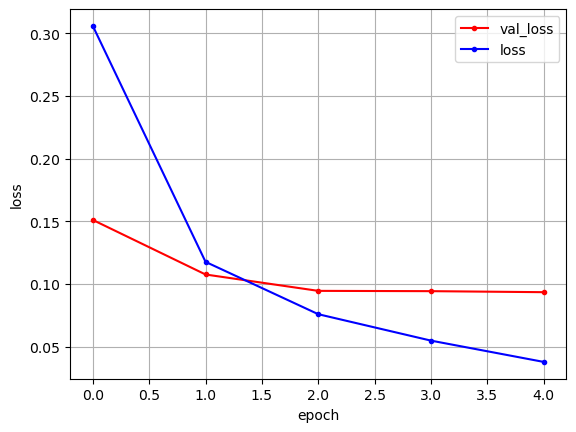

In [23]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_num = np.arange(len(y_vloss))

plt.plot(x_num, y_vloss, marker='.', c='red', label='val_loss')
plt.plot(x_num, y_loss, marker='.', c='blue', label='loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show

In [35]:
model.predict(X_train[0].reshape(1,-1))

1/1 [==============================] - 0s 88ms/step


array([[1.9305171e-03, 6.7041539e-02, 2.5527120e-01, 9.9997252e-01,
        1.2181584e-07, 9.9999839e-01, 8.0674849e-02, 7.6996136e-01,
        2.8564432e-03, 2.3596825e-01]], dtype=float32)

In [34]:
X_train[0].reshape(1,-1).shape

(1, 784)

In [37]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
plt.imshow(X_train[0])
plt.show()